In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("Data/Global Economy Indicators.csv")

# Pandas Practice

## Introduction:

#### This analysis uses national account data from over 200 countries, collected by the United Nations since 1970. The goal is to explore global economic trends, identify patterns in development indicators, and prepare the data for meaningful insights.

## Objective📊:

#### The objective is to clean, understand, and explore the data in preparation for clustering countries by economic indicators and performing time series forecasting on GDP trends.

#### First of all its very important to know the dataset details like columns and their type so we can know what we are going to do, (Define the columns and their types)

In [30]:
df

,CountryID,Country,Year,AMA exchange rate,IMF based exchange rate,Population,Currency,Per capita GNI,"Agriculture, hunting, forestry, fishing (ISIC A-B)",Changes in inventories,...,Household consumption expenditure (including Non-profit institutions serving households),Imports of goods and services,Manufacturing (ISIC D),"Mining, Manufacturing, Utilities (ISIC C-E)",Other Activities (ISIC J-P),Total Value Added,"Transport, storage and communication (ISIC I)","Wholesale, retail trade, restaurants and hotels (ISIC G-H)",Gross National Income(GNI) in USD,Gross Domestic Product (GDP)
0,4,Afghanistan,1970,0.044998,0.044998,10752971,Afghani,164,8.699174e+08,NaN,...,1.551094e+09,1.952772e+08,3.701468e+08,3.766908e+08,1.277478e+08,1.731454e+09,8.391720e+07,2.263871e+08,1.766528e+09,1.731436e+09
1,4,Afghanistan,1971,0.044998,0.044998,11015857,Afghani,168,9.108281e+08,NaN,...,1.675426e+09,2.762965e+08,3.875495e+08,3.944012e+08,1.337541e+08,1.812857e+09,8.786038e+07,2.370192e+08,1.850122e+09,1.812838e+09
2,4,Afghanistan,1972,0.044998,0.044998,11286753,Afghani,149,8.279453e+08,NaN,...,1.498812e+09,2.903704e+08,3.522847e+08,3.585129e+08,1.215827e+08,1.647918e+09,7.986452e+07,2.154773e+08,1.683948e+09,1.647900e+09
3,4,Afghanistan,1973,0.044998,0.044998,11575305,Afghani,150,8.554869e+08,NaN,...,1.508024e+09,2.629629e+08,3.640103e+08,3.704458e+08,1.256302e+08,1.702735e+09,8.252888e+07,2.226243e+08,1.739998e+09,1.702716e+09
4,4,Afghanistan,1974,0.044998,0.044998,11869879,Afghani,177,1.035913e+09,NaN,...,1.778819e+09,3.056792e+08,4.407604e+08,4.485528e+08,1.521192e+08,2.061752e+09,9.991860e+07,2.695259e+08,2.106420e+09,2.061729e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10507,894,Zambia,2017,9.519501,9.519501,17298054,Kwacha,1448,1.041005e+09,567729313.0,...,1.215309e+10,9.465895e+09,2.102369e+09,7.194153e+09,6.187124e+09,2.416662e+10,1.965026e+09,5.323590e+09,2.505604e+10,2.586816e+10
10508,894,Zambia,2018,10.458143,10.458143,17835893,Kwacha,1451,8.791160e+08,929063411.0,...,1.183200e+10,9.717269e+09,1.801783e+09,6.556884e+09,5.791375e+09,2.422570e+10,2.490720e+09,5.990720e+09,2.588455e+10,2.631198e+10
10509,894,Zambia,2019,12.889418,12.889418,18380477,Kwacha,1246,6.668385e+08,817104395.0,...,9.848112e+09,7.961415e+09,1.582484e+09,5.584425e+09,5.231062e+09,2.153971e+10,2.537646e+09,4.959277e+09,2.291011e+10,2.331036e+10
10510,894,Zambia,2020,18.344093,18.344093,18927715,Kwacha,928,5.391694e+08,439295787.0,...,6.969267e+09,5.892353e+09,1.397303e+09,4.269405e+09,4.217431e+09,1.718020e+10,2.258715e+09,3.234123e+09,1.756233e+10,1.811064e+10


In [31]:
table_info = df.info()
table_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10512 entries, 0 to 10511
Data columns (total 26 columns):
 #   Column                                                                                      Non-Null Count  Dtype  
---  ------                                                                                      --------------  -----  
 0    CountryID                                                                                  10512 non-null  int64  
 1    Country                                                                                    10512 non-null  object 
 2    Year                                                                                       10512 non-null  int64  
 3    AMA exchange rate                                                                          10512 non-null  float64
 4    IMF based exchange rate                                                                    10512 non-null  float64
 5    Population                            

### Overviewing the data:

#### We use the following functions to overview the table:

In [32]:
# we use .head method to show the table from the top, and we can mention the number inside the .head method to specify the number of rows to show
df.head(7)

,CountryID,Country,Year,AMA exchange rate,IMF based exchange rate,Population,Currency,Per capita GNI,"Agriculture, hunting, forestry, fishing (ISIC A-B)",Changes in inventories,...,Household consumption expenditure (including Non-profit institutions serving households),Imports of goods and services,Manufacturing (ISIC D),"Mining, Manufacturing, Utilities (ISIC C-E)",Other Activities (ISIC J-P),Total Value Added,"Transport, storage and communication (ISIC I)","Wholesale, retail trade, restaurants and hotels (ISIC G-H)",Gross National Income(GNI) in USD,Gross Domestic Product (GDP)
0,4,Afghanistan,1970,0.044998,0.044998,10752971,Afghani,164,8.699174e+08,NaN,...,1.551094e+09,195277226.0,370146827.0,376690811.0,127747843.0,1.731454e+09,83917200.0,226387091.0,1.766528e+09,1.731436e+09
1,4,Afghanistan,1971,0.044998,0.044998,11015857,Afghani,168,9.108281e+08,NaN,...,1.675426e+09,276296480.0,387549502.0,394401164.0,133754097.0,1.812857e+09,87860382.0,237019196.0,1.850122e+09,1.812838e+09
2,4,Afghanistan,1972,0.044998,0.044998,11286753,Afghani,149,8.279453e+08,NaN,...,1.498812e+09,290370350.0,352284669.0,358512865.0,121582672.0,1.647918e+09,79864525.0,215477287.0,1.683948e+09,1.647900e+09
3,4,Afghanistan,1973,0.044998,0.044998,11575305,Afghani,150,8.554869e+08,NaN,...,1.508024e+09,262962880.0,364010279.0,370445793.0,125630236.0,1.702735e+09,82528885.0,222624293.0,1.739998e+09,1.702716e+09
4,4,Afghanistan,1974,0.044998,0.044998,11869879,Afghani,177,1.035913e+09,NaN,...,1.778819e+09,305679151.0,440760406.0,448552790.0,152119162.0,2.061752e+09,99918604.0,269525910.0,2.106420e+09,2.061729e+09
5,4,Afghanistan,1975,0.044998,0.044998,12157386,Afghani,195,1.165441e+09,NaN,...,1.987672e+09,333827202.0,495891889.0,504659018.0,171142804.0,2.319778e+09,112416374.0,303432162.0,2.369877e+09,2.319754e+09
6,4,Afghanistan,1976,0.044998,0.044998,12425267,Afghani,207,1.262892e+09,NaN,...,2.081621e+09,370617399.0,537391228.0,546891983.0,185472327.0,2.513608e+09,121865126.0,328544951.0,2.568149e+09,2.513581e+09


In [33]:
# we use .tail method to show the table from the bottom, and we can mention the number inside the .tail method to specify the number of rows to show
df.tail(7)

,CountryID,Country,Year,AMA exchange rate,IMF based exchange rate,Population,Currency,Per capita GNI,"Agriculture, hunting, forestry, fishing (ISIC A-B)",Changes in inventories,...,Household consumption expenditure (including Non-profit institutions serving households),Imports of goods and services,Manufacturing (ISIC D),"Mining, Manufacturing, Utilities (ISIC C-E)",Other Activities (ISIC J-P),Total Value Added,"Transport, storage and communication (ISIC I)","Wholesale, retail trade, restaurants and hotels (ISIC G-H)",Gross National Income(GNI) in USD,Gross Domestic Product (GDP)
10505,894,Zambia,2015,8.632356,8.632356,16248230,Kwacha,1286,1.058100e+09,924510068.0,...,1.076072e+10,1.002177e+10,1.597999e+09,4.990098e+09,5.394217e+09,2.015132e+10,1.461965e+09,5.120827e+09,2.089511e+10,2.085896e+10
10506,894,Zambia,2016,10.313053,10.313053,16767761,Kwacha,1211,1.305103e+09,374156897.0,...,1.077270e+10,8.095285e+09,1.610541e+09,5.152366e+09,5.225743e+09,1.996651e+10,1.407106e+09,4.720461e+09,2.030301e+10,2.145262e+10
10507,894,Zambia,2017,9.519501,9.519501,17298054,Kwacha,1448,1.041005e+09,567729313.0,...,1.215309e+10,9.465895e+09,2.102369e+09,7.194153e+09,6.187124e+09,2.416662e+10,1.965026e+09,5.323590e+09,2.505604e+10,2.586816e+10
10508,894,Zambia,2018,10.458143,10.458143,17835893,Kwacha,1451,8.791160e+08,929063411.0,...,1.183200e+10,9.717269e+09,1.801783e+09,6.556884e+09,5.791375e+09,2.422570e+10,2.490720e+09,5.990720e+09,2.588455e+10,2.631198e+10
10509,894,Zambia,2019,12.889418,12.889418,18380477,Kwacha,1246,6.668385e+08,817104395.0,...,9.848112e+09,7.961415e+09,1.582484e+09,5.584425e+09,5.231062e+09,2.153971e+10,2.537646e+09,4.959277e+09,2.291011e+10,2.331036e+10
10510,894,Zambia,2020,18.344093,18.344093,18927715,Kwacha,928,5.391694e+08,439295787.0,...,6.969267e+09,5.892353e+09,1.397303e+09,4.269405e+09,4.217431e+09,1.718020e+10,2.258715e+09,3.234123e+09,1.756233e+10,1.811064e+10
10511,894,Zambia,2021,20.018487,20.018487,19473125,Kwacha,1062,6.285287e+08,293485060.0,...,8.423339e+09,7.735235e+09,1.876458e+09,6.639510e+09,4.250492e+09,2.071254e+10,2.060541e+09,3.881353e+09,2.067962e+10,2.131337e+10


In [34]:
# used to show as the overview numbers within the data for each numeric colums only and we ignore the non-numeric columns
df.describe()

,CountryID,Year,AMA exchange rate,IMF based exchange rate,Population,Per capita GNI,"Agriculture, hunting, forestry, fishing (ISIC A-B)",Changes in inventories,Construction (ISIC F),Exports of goods and services,...,Household consumption expenditure (including Non-profit institutions serving households),Imports of goods and services,Manufacturing (ISIC D),"Mining, Manufacturing, Utilities (ISIC C-E)",Other Activities (ISIC J-P),Total Value Added,"Transport, storage and communication (ISIC I)","Wholesale, retail trade, restaurants and hotels (ISIC G-H)",Gross National Income(GNI) in USD,Gross Domestic Product (GDP)
count,10512.000000,10512.000000,1.051200e+04,1.051200e+04,1.051200e+04,10512.000000,1.039100e+04,8.671000e+03,1.051200e+04,1.049100e+04,...,1.046000e+04,1.047000e+04,1.046900e+04,1.051200e+04,1.051200e+04,1.051200e+04,1.046300e+04,1.046300e+04,1.051200e+04,1.051200e+04
mean,431.116629,1996.262747,3.573959e+02,3.419846e+02,2.851523e+07,8965.564593,7.793212e+09,1.626543e+09,1.002199e+10,4.671176e+10,...,1.055041e+11,4.591504e+10,3.092586e+10,4.153282e+10,7.474487e+10,1.744795e+11,1.556757e+10,2.509568e+10,1.825260e+11,1.828765e+11
std,251.169090,14.900361,2.291128e+03,1.941857e+03,1.141296e+08,17070.205895,4.034349e+10,8.932353e+09,4.985596e+10,1.748857e+11,...,6.038454e+11,1.804351e+11,1.723910e+11,2.112576e+11,4.840568e+11,9.746041e+11,9.187359e+10,1.391727e+11,9.942144e+11,9.845997e+11
min,4.000000,1970.000000,4.300000e-14,4.300000e-14,4.359000e+03,34.000000,2.813900e+04,-1.510000e+11,1.577280e+05,-1.669759e+09,...,7.960260e+05,1.982159e+06,-2.484990e+05,-2.581190e+06,1.044040e+06,2.411113e+06,-6.479048e+06,2.302090e+05,3.564833e+06,2.585174e+06
25%,212.000000,1984.000000,1.000000e+00,1.000000e+00,6.330615e+05,730.000000,1.304522e+08,4.673545e+05,6.815523e+07,4.026725e+08,...,9.389897e+08,5.891469e+08,1.109497e+08,1.857038e+08,3.555891e+08,1.355670e+09,8.998828e+07,2.078732e+08,1.410772e+09,1.439217e+09
50%,430.000000,1997.000000,2.812895e+00,2.761315e+00,5.051556e+06,2316.500000,9.313674e+08,6.829635e+07,3.717701e+08,2.407906e+09,...,5.154424e+09,2.891919e+09,9.113543e+08,1.597027e+09,2.107421e+09,7.493971e+09,5.441500e+08,1.056493e+09,7.887233e+09,8.070572e+09
75%,643.000000,2009.000000,5.134316e+01,4.806684e+01,1.678862e+07,8965.750000,4.023326e+09,6.910750e+08,2.815730e+09,1.542492e+10,...,3.008905e+10,1.602312e+10,7.405364e+09,1.251358e+10,1.442130e+10,4.819144e+10,3.975893e+09,6.707456e+09,5.005789e+10,5.172596e+10
max,894.000000,2021.000000,1.116366e+05,4.200000e+04,1.425893e+09,234317.000000,1.350000e+12,2.110000e+11,1.240000e+12,3.530000e+12,...,1.590000e+13,3.400000e+12,4.870000e+12,5.780000e+12,1.290000e+13,2.330000e+13,2.490000e+12,3.520000e+12,2.360000e+13,2.330000e+13


In [35]:
print(df.columns)
print(df.index)

Index([' CountryID ', ' Country ', ' Year ', ' AMA exchange rate ',
       ' IMF based exchange rate ', ' Population ', ' Currency ',
       ' Per capita GNI ',
       ' Agriculture, hunting, forestry, fishing (ISIC A-B) ',
       ' Changes in inventories ', ' Construction (ISIC F) ',
       ' Exports of goods and services ', ' Final consumption expenditure ',
       ' General government final consumption expenditure ',
       ' Gross capital formation ',
       ' Gross fixed capital formation (including Acquisitions less disposals of valuables) ',
       ' Household consumption expenditure (including Non-profit institutions serving households) ',
       ' Imports of goods and services ', ' Manufacturing (ISIC D) ',
       ' Mining, Manufacturing, Utilities (ISIC C-E) ',
       ' Other Activities (ISIC J-P) ', ' Total Value Added ',
       ' Transport, storage and communication (ISIC I) ',
       ' Wholesale, retail trade, restaurants and hotels (ISIC G-H) ',
       ' Gross National In

In [36]:
# This works only with numeric columns
df[' Year '].describe()

count    10512.000000
mean      1996.262747
std         14.900361
min       1970.000000
25%       1984.000000
50%       1997.000000
75%       2009.000000
max       2021.000000
Name:  Year , dtype: float64

In [37]:
# For non-numeric columns
df[[' Country ', ' Currency ']].describe()

,Country,Currency
count,10512,10512
unique,220,153
top,Afghanistan,Euro
freq,52,1108


In [38]:
df.shape

(10512, 26)

In [39]:
# the unique values in the specific column.
df[' Country '].unique()

array([' Afghanistan ', ' Albania ', ' Algeria ', ' Andorra ', ' Angola ',
       ' Antigua and Barbuda ', ' Azerbaijan ', ' Argentina ',
       ' Australia ', ' Austria ', ' Bahamas ', ' Bahrain ',
       ' Bangladesh ', ' Armenia ', ' Barbados ', ' Belgium ',
       ' Bermuda ', ' Bhutan ', ' Bolivia (Plurinational State of) ',
       ' Bosnia and Herzegovina ', ' Botswana ', ' Brazil ', ' Belize ',
       ' Solomon Islands ', ' British Virgin Islands ',
       ' Brunei Darussalam ', ' Bulgaria ', ' Myanmar ', ' Burundi ',
       ' Belarus ', ' Cambodia ', ' Cameroon ', ' Canada ',
       ' Cabo Verde ', ' Cayman Islands ', ' Central African Republic ',
       ' Sri Lanka ', ' Chad ', ' Chile ', ' China ', ' Colombia ',
       ' Comoros ', ' Congo ', ' D.R. of the Congo ', ' Cook Islands ',
       ' Costa Rica ', ' Croatia ', ' Cuba ', ' Cyprus ',
       ' Czechoslovakia (Former) ', ' Czechia ', ' Benin ', ' Denmark ',
       ' Dominica ', ' Dominican Republic ', ' Ecuador ', ' El Sa

In [40]:
# to count the unique and how many times occurs
df[' Country '].value_counts()

 Country 
Afghanistan                   52
Albania                       52
Algeria                       52
Andorra                       52
Angola                        52
                              ..
USSR (Former)                 21
Curaçao                       17
Sint Maarten (Dutch part)     17
Sudan                         14
South Sudan                   14
Name: count, Length: 220, dtype: int64

In [41]:
# to count the null values
df.isnull().sum()

CountryID                                                                                       0
Country                                                                                         0
Year                                                                                            0
AMA exchange rate                                                                               0
IMF based exchange rate                                                                         0
Population                                                                                      0
Currency                                                                                        0
Per capita GNI                                                                                  0
Agriculture, hunting, forestry, fishing (ISIC A-B)                                            121
Changes in inventories                                                                       1841
Construction (ISIC F

### Plotting

<Axes: >

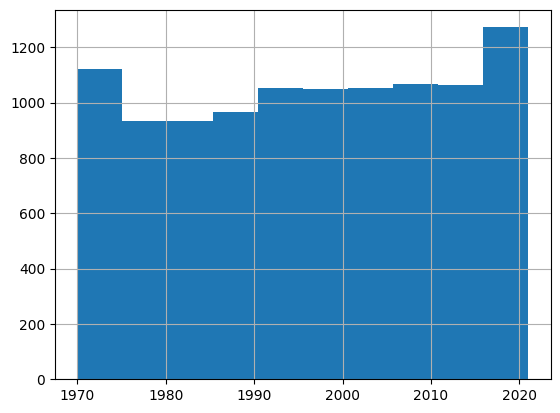

In [42]:
df[' Year '].hist()

<Axes: >

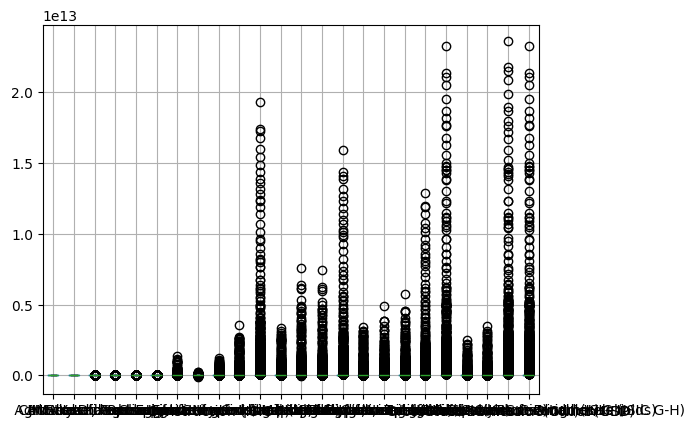

In [43]:
df.boxplot()

### Top 5 countries by average GDP:

In [44]:
# as they mentioned they want 5 countries so will be group by the country then they want the top Gross them we get the mean (Avg) thhen to sort the highest to low we use .sort_values(ascending = False) then head 5 to get the top 5 only
top_5_avg_gdp = df.groupby(' Country ')[' Gross Domestic Product (GDP) '].mean().sort_values(ascending = False).head(5)
top_5_avg_gdp

 Country 
United States      9.321346e+12
Japan              3.417731e+12
China              3.372873e+12
Germany            2.095904e+12
United Kingdom     1.515096e+12
Name:  Gross Domestic Product (GDP) , dtype: float64

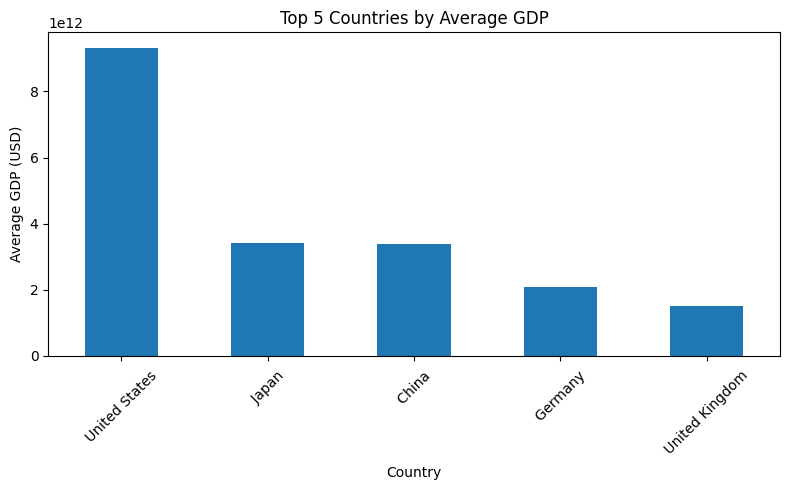

In [45]:
top_5_avg_gdp.plot(kind='bar', figsize=(8, 5))
plt.title("Top 5 Countries by Average GDP")
plt.ylabel("Average GDP (USD)")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Countries with the Household consumption expenditure in the most recent year.

In [57]:
# highest_inflation = df.groupby(' Country ')[' Year '].max().sort_values(ascending = False).head(5)
# highest_inflation

year = df[' Year '].max()
data = df[df[' Year '] == year] # Filter data for that year
data = data.sort_values(' Household consumption expenditure (including Non-profit institutions serving households) ', ascending=False)
recent_year_hce = data[[' Country ', ' Household consumption expenditure (including Non-profit institutions serving households) ']].head(5)
recent_year_hce

,Country,Household consumption expenditure (including Non-profit institutions serving households)
10144,United States,1.590000e+13
1999,China,6.800000e+12
4680,Japan,2.660000e+12
3484,Germany,2.100000e+12
4212,India,1.910000e+12


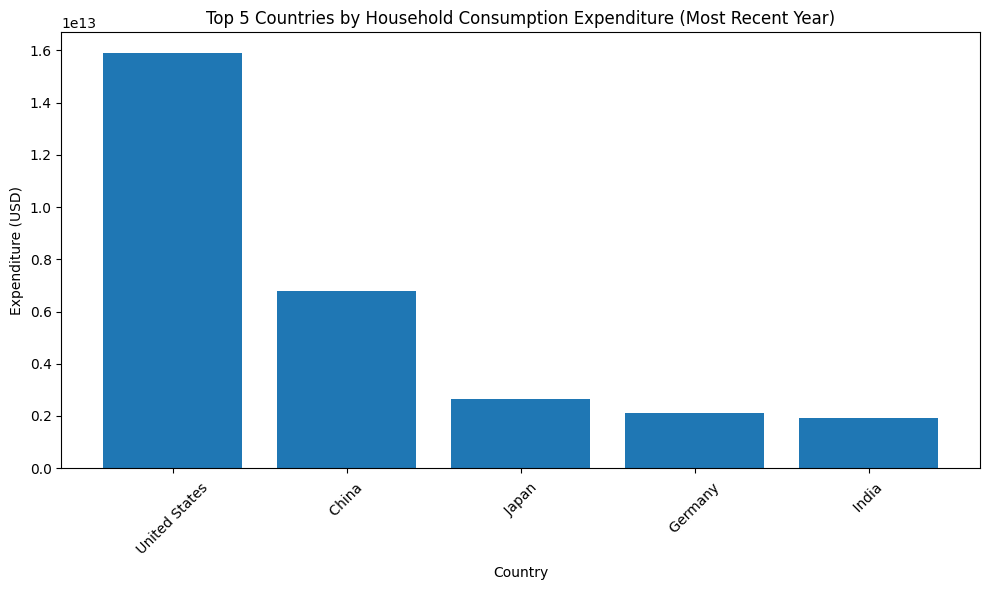

In [62]:
# plt.figure(figsize=(10, 6)) # This used to create the canvas which is 10 inches wide and 6 inches tall.
# recent_year_hce.plot(kind = 'barh') # We mention the variacle that we want to plot, and the "barh" kind means the horizantal barchart.
# plt.title("Household Consumption Expenditure") # This will create the title of the chart.
# plt.xlabel("IMF Based Exchange Rate") # labeling the x-axis to know what we are mean.
# plt.ylabel(" Country ") # labeling the y-axis to know what we are mean.
# plt.show()

plt.figure(figsize=(10, 6))
plt.bar(recent_year_hce[' Country '], recent_year_hce[' Household consumption expenditure (including Non-profit institutions serving households) '])
plt.title("Top 5 Countries by Household Consumption Expenditure (Most Recent Year)")
plt.xlabel("Country")
plt.ylabel("Expenditure (USD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Mean GDP per capita:

In [ ]:
mean_gdp = df.groupby(' Country ')[' Per capita GNI '].mean().head(10)
mean_gdp

In [ ]:
plt.figure(figsize=(10, 6)) # This used to create the canvas which is 10 inches wide and 6 inches tall.
mean_gdp.plot(kind = 'barh') # We mention the variacle that we want to plot, and the "barh" kind means the horizantal barchart.
plt.title("Top 10 Countries by Mean GDP per Capita") # This will create the title of the chart.
plt.xlabel("Mean GDP per Capita (USD)") # labeling the x-axis to know what we are mean.
plt.ylabel("Country") # labeling the y-axis to know what we are mean.
plt.show()

### Max unemployment rate:

No column for unemployment

### Total exports over all years:

In [ ]:
total_exports = df.groupby(' Country ')[' Exports of goods and services '].sum().head(10)
total_exports

In [ ]:
plt.figure(figsize=(10, 6)) # This used to create the canvas which is 10 inches wide and 6 inches tall.
total_exports.plot(kind = 'bar') # We mention the variacle that we want to plot, and the "barh" kind means the horizantal barchart.
plt.title("Top 10 Countries by Total Exports") # This will create the title of the chart.
plt.xlabel("Total Exports (USD)") # labeling the x-axis to know what we are mean.
plt.ylabel("Country") # labeling the y-axis to know what we are mean.
plt.show()